In [ ]:
%matplotlib inline

### Processing Text

In this notebook we'll take a quick look at some additional methods of getting information out of text. Python has many tools for this.  First, there are the built in string functions - it's worth taking a minute to look through them:

https://docs.python.org/3.6/library/stdtypes.html?highlight=isdigit#text-sequence-type-str

https://docs.python.org/3.6/library/string.html

In [4]:
s = "Sample text with NUMBERS 123456"
print(s.upper())
print(s.lower())
print(s.title())


SAMPLE TEXT WITH NUMBERS 123456
sample text with numbers 123456
Sample Text With Numbers 123456


In [5]:
words = s.split()
print("Text", "Digit", "Title", "Upper", "Lower")
for w in words:
    print(w, w.isdigit(), w.istitle(), w.isupper(), w.islower())

Text Digit Title Upper Lower
Sample False True False False
text False False False True
with False False False True
NUMBERS False False True False
123456 True False False False


There are also built-in collections of characters that can be handy for text processing:

In [7]:
import string
print(string.punctuation)
print(string.digits)
print(repr(string.whitespace))  # repr() returns the printable representation of an object.

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
0123456789
' \t\n\r\x0b\x0c'


**Question:** Using these functions, can you take the text in the sample file called "data_without_delimiters.txt" and pull out the **eins** and the **zip codes**?  It might make sense to start by splitting each line into words using split(), then looking for the word length and type of characters in each, and printing those out.  If there is time, you might also try to pull out the two-letter state abbreviations. 

In [8]:
import json

with open("data_without_delimiters.txt") as f:
    lines = f.read().splitlines()  # Splitlines implicitly gets rid of \n newline characters.

for line in lines:
    ########## Your code here #############
    pass

Sometimes, you need to do some more tricky parsing of strings.  For this, **regular expressions** can be handy:

https://docs.python.org/3.6/howto/regex.html

https://www.debuggex.com/cheatsheet/regex/python
     
Regular expressions are terse string pattern matching commands that, when applied to a string, return elements that match the patterns. To use them in Python, you first compile the pattern into a pattern object, then apply that object to a string to find matches. The python library includes a search function, which finds the first occurrence; findall searches the whole string.  

A simple regular expression is just a string of characters:

In [9]:
import re
p = re.compile('test')
m = p.findall('this string contains one test word')
print(m) 

['test']


There are also special characters that define pattern attributes:

In [10]:
import re
p = re.compile('\d') # \d matches decimal.
s = "testing this text with the number 123456"
m = p.findall(s)  
print(m)

['1', '2', '3', '4', '5', '6']


In [11]:
import re
p = re.compile('\d+') # + repeats one or more times.
s = "testing this text with the number 123456"
m = p.findall(s)
print(m)

['123456']


In [12]:
import re
p = re.compile("t\w+t") # t matches the letter t, \w matches any w alphanumeric character.
s = "testing this text with the number 123456"
m = p.findall(s)  
print(m)

['test', 'text']


In [13]:
import re
s = "510311790 THE SHEPHERD PLACE INC 1362 S GOVERNORS AVENUE DOVER DE 19904 JAMES MOORE 430457"
p = re.compile('\d{9}') # Number in brackets looks for a certain number of items.
m = p.findall(s)
print(m)

['510311790']


**Question:** Using regular expressions, can you pull out the 5-digit zip code, two-letter state, and 9-digit ein from this string?  Refer to the regex links above.  Hint - it might be easiest to do each separately instead of trying to put them all in one expression.  Note that:

```
\s finds a single whitespace character
{n} finds n occurrences, so \d{5} finds five-digit numbers
[A-Z] matches uppercase letters
```

In [14]:
import re
s = "510311790 THE SHEPHERD PLACE INC 1362 S GOVERNORS AVENUE DOVER DE 19904 JAMES MOORE"
############## Your code here ###############


### The Natural Language Toolkit

There are many packages available for various aspects of text processing (entity extraction and classification are the ones we use most internally).  NLTK is a good place to start because it is relatively straightforward to use and is well documented. 

http://www.nltk.org/
http://www.nltk.org/book

You can install it with the pip installer:

```
pip install nltk
```

It relies on a lot of ancillary data, which can be downloaded with this command, from within python (class machines already have this installed):

```
import nltk
nltk.download()
```

One of the main uses of NLTK is to parse words and sentences.  Here are some examples - note that the third example actually appends parts of speech (POS) to each word (reference list of POS tags is here: https://cs.nyu.edu/grishman/jet/guide/PennPOS.html). For more details on how best to use these, it is worth going through the NLTK book.

In [15]:
import nltk
import csv

sample_text = ""
with open("data.txt") as f:
    dr = csv.DictReader(f, delimiter="\t")
    for d in dr:
        sample_text = d["mission"].lower()
        break

for sent in nltk.sent_tokenize(sample_text):
    print(sent)

for sent in nltk.sent_tokenize(sample_text):
    print (list(nltk.wordpunct_tokenize(sent)))

for sent in nltk.sent_tokenize(sample_text):
    print(list(nltk.pos_tag(nltk.word_tokenize(sent))))

text = list(nltk.word_tokenize(sample_text))
print(text)

to provide emergency shelter for homeless families & individuals.
['to', 'provide', 'emergency', 'shelter', 'for', 'homeless', 'families', '&', 'individuals', '.']
[('to', 'TO'), ('provide', 'VB'), ('emergency', 'NN'), ('shelter', 'NN'), ('for', 'IN'), ('homeless', 'NN'), ('families', 'NNS'), ('&', 'CC'), ('individuals', 'NNS'), ('.', '.')]
['to', 'provide', 'emergency', 'shelter', 'for', 'homeless', 'families', '&', 'individuals', '.']


One of the challenges dealing with text is the many different word endings.  NLTK provides a set of "stemmers", that is, tools that strip off different word endings, making it easier to identify words in common between documents:

In [16]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer

import nltk
import csv

sample_text = ""
with open("data.txt") as f:
    dr = csv.DictReader(f, delimiter="\t")
    for d in dr:
        sample_text = d["mission"].lower()
        break

text = list(nltk.word_tokenize(sample_text))
print(" ".join(text))

snowball = SnowballStemmer('english')
lancaster = LancasterStemmer()
porter = PorterStemmer()

for stemmer in (snowball, lancaster, porter):
    stemmed_text = [stemmer.stem(t) for t in text]
    print(" ".join(stemmed_text))


to provide emergency shelter for homeless families & individuals .
to provid emerg shelter for homeless famili & individu .
to provid emerg shelt for homeless famy & individ .
to provid emerg shelter for homeless famili & individu .


A more expensive operation is to lemmatize words, that is, to reduce them to the root word, taking into account its part of speech (http://textminingonline.com/dive-into-nltk-part-iv-stemming-and-lemmatization).

In [17]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
import csv

sample_text = ""
with open("data.txt") as f:
    dr = csv.DictReader(f, delimiter="\t")
    for d in dr:
        sample_text = d["mission"]
        break
text = list(nltk.word_tokenize(sample_text.lower()))
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(t) for t in text]
print(sample_text)
print(" ".join(lemmas))

TO PROVIDE EMERGENCY SHELTER FOR HOMELESS FAMILIES & INDIVIDUALS.
to provide emergency shelter for homeless family & individual .


By default the lemmatizer assumes each word is a noun.If you know the part of speech, you can tell it to lemmatize using that information:

In [18]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("wanderings", pos='n'))
print(lemmatizer.lemmatize("wanderings", pos='v'))

wandering
wander


A common set of tasks for pre-processing text is to remove stopwords (words likely to be irrelevant, like "and" and "the").  This can bold a statement down to its essential terms. This code combines these steps into one function that can boil words down into usable basic forms:

In [19]:
import string
import nltk
from nltk import WordNetLemmatizer
import csv

## Module constants
lemmatizer  = WordNetLemmatizer()
stopwords   = set(nltk.corpus.stopwords.words('english'))
punctuation = string.punctuation

def normalize(text):
    results = []
    for token in nltk.word_tokenize(text):
        token = token.lower()
        token = lemmatizer.lemmatize(token)
        if token not in stopwords and token not in punctuation:
            results.append(token)
    return(results)

sample_text = ""
with open("data.txt") as f:
    dr = csv.DictReader(f, delimiter="\t")
    for d in dr:
        sample_text = d["mission"]
        break

print (sample_text)
print (list(normalize(sample_text)))

TO PROVIDE EMERGENCY SHELTER FOR HOMELESS FAMILIES & INDIVIDUALS.
['provide', 'emergency', 'shelter', 'homeless', 'family', 'individual']


**Question:** starting with the code below, can you compare the top 50 most common terms from mission statements in New York City versus the rest of New York State?  Does there seem to be any difference?

A couple of Python tools might be useful - the default dictionary, which will initialize each dictionary entry to a given type when the entry is created. These are included in the collections package.  Another is the dictionary .get function, which is a fast way of getting a dictionary value. If the requested key doesn't exist, it returns a default value instead of throwing an exception.  

In [20]:
import string
import nltk
from nltk import WordNetLemmatizer
import csv
from collections import defaultdict
import json

lemmatizer  = WordNetLemmatizer()
stopwords   = set(nltk.corpus.stopwords.words('english'))
punctuation = string.punctuation

def normalize(text):
    results = []
    for token in nltk.word_tokenize(text):
        token = token.lower()
        token = lemmatizer.lemmatize(token)
        if token not in stopwords and token not in punctuation:
            results.append(token)
    return(results)

word_dict = defaultdict(int)
with open("all_data.txt") as f:
    dr = csv.DictReader(f, delimiter="\t")
    for d in dr:
        if d["state"].lower() == "ny" and d["city"] == "New York":
            ############ Your code here ##############
            pass

sorted_list = sorted(word_dict, key=word_dict.get, reverse=True)
print (json.dumps(sorted_list[:50]))

[]


## Working with Corpora

NLTK ships with a variety of document corpora, or collections of documents.  We can also load our own.  A simple way to start is to just load a single file of text. This lets us gather quick statistics about the words in the collection of documents:

The are several built in corpora and corpus readers.  The PLaintextCorpusReader lets us load in plain text files; others include text attributes like POS tags.

In [21]:
import nltk
from nltk.corpus.reader import PlaintextCorpusReader
nyc = PlaintextCorpusReader("./", "./nyc.txt")
print(list(nyc.words("./nyc.txt"))[0:100])
nys = PlaintextCorpusReader("./", "./nys.txt")
print(list(nys.words("./nys.txt"))[0:100])

['american', 'foundation', 'paris', 'school', 'see', 'schedule', 'hudson', 'review', 'inc', 'publication', 'quarterly', 'literary', 'magazine', 'public', 'medium', 'inc', 'organization', 'serf', 'fiscal', 'adminstrator', 'grant', 'independent', 'film', 'producer', 'production', 'documentary', 'film', 'mhany', '1999', 'housing', 'development', 'fund', 'corporation', 'develop', 'non', '-', 'profit', 'basis', 'housing', 'project', 'person', 'low', 'income', 'council', 'foreign', 'relation', 'inc', 'cfr', 'independent', 'non', '-', 'partisan', 'membership', 'organization', 'think', 'tank', 'publisher', 'dedicated', 'under', '-', 'standing', 'foreign', 'policy', 'choice', 'facing', 'u', '.', 's', '.', 'country', 'liederkranz', 'foundation', 'inc', 'development', 'appreciation', 'music', 'mhany', '2004', 'housing', 'development', 'fund', 'corporation', 'develop', 'non', '-', 'profit', 'basis', 'housing', 'project', 'person', 'low', 'income', 'roofing', 'industry', 'promotion', 'fund', 'ny', 

The NLTK Text class lets us do some interesting explorations of the text. The corcordance function, for example, performs a search for the given token and then also provides the surrounding context:

In [22]:
nyc_text = nltk.text.Text(nyc.words("./nyc.txt"))
nyc_text.concordance("health")

Displaying 25 of 354 matches:
cational presentation liver disease health care provider liver disease patient
local 580 shop welfare fund provide health benefit eligible participant depend
 department aging include hot lunch health promotion activity art workshop edu
er ' s day council inc child family health charity recognize father mother exe
ion website fair . org brazil child health inc office associacao saude crianca
grant support better school housing health care protect civil liberty help cre
ote torah study caribbean woman ' s health caribbean woman ' s health associat
oman ' s health caribbean woman ' s health association operates high quality c
omprehensive culturally appropriate health education social support service im
nclude referral federally qualified health center primary health care infant m
lly qualified health center primary health care infant mortality reduction par
rganization organized aiding mental health patient live productive fulfilling 
erved meal provided ca

Given some context surrounding a word, we can discover similar words, e.g. words that that occur frequently in the same context and with a similar distribution: Distributional similarity: 

In [23]:
print(nyc_text.similar("health"))

educational day medical child welfare home primary service education
youth safety community social care life public resource advance
residential economic
None


NLTK also uses matplotlib and pylab to display graphs and charts that can show dispersions and frequency.  A dispersion plot can give you a quick picture of how words are distributed in a block of text - are they all clumped together or spread evenly, etc. 

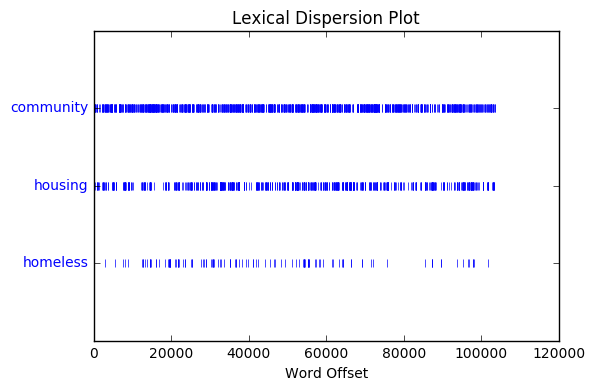

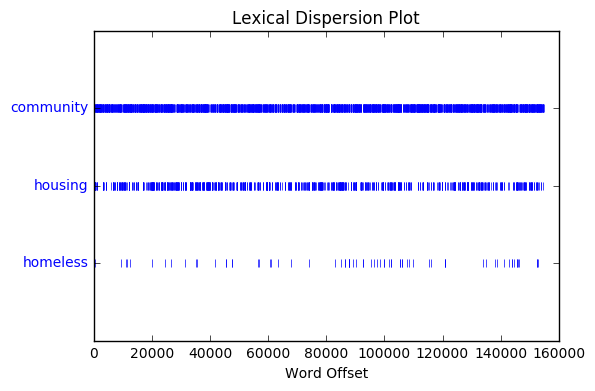

In [24]:
nyc_text = nltk.text.Text(nyc.words("./nyc.txt"))
nys_text = nltk.text.Text(nyc.words("./nys.txt"))
nyc_text.dispersion_plot(["community", "housing", "homeless"])
nys_text.dispersion_plot(["community", "housing", "homeless"])

To explore much of the built in corpus, use the following methods:

We can also use the corpus object to parse the text into paragraphs, sentences, or words, or just the raw text.

https://github.com/alukach/nltk-experiments/blob/master/natural_language_processing_toolkits_cheatsheet.md

In [25]:
nyc.paras("./nyc.txt")[0:5]

[[['american',
   'foundation',
   'paris',
   'school',
   'see',
   'schedule',
   'hudson',
   'review',
   'inc',
   'publication',
   'quarterly',
   'literary',
   'magazine',
   'public',
   'medium',
   'inc',
   'organization',
   'serf',
   'fiscal',
   'adminstrator',
   'grant',
   'independent',
   'film',
   'producer',
   'production',
   'documentary',
   'film',
   'mhany',
   '1999',
   'housing',
   'development',
   'fund',
   'corporation',
   'develop',
   'non',
   '-',
   'profit',
   'basis',
   'housing',
   'project',
   'person',
   'low',
   'income',
   'council',
   'foreign',
   'relation',
   'inc',
   'cfr',
   'independent',
   'non',
   '-',
   'partisan',
   'membership',
   'organization',
   'think',
   'tank',
   'publisher',
   'dedicated',
   'under',
   '-',
   'standing',
   'foreign',
   'policy',
   'choice',
   'facing',
   'u',
   '.',
   's',
   '.',
   'country',
   'liederkranz',
   'foundation',
   'inc',
   'development',
   'appreci

In [26]:
nyc.sents("./all_text.txt")[:5]

[['shepherd',
  'place',
  'inc',
  'provide',
  'emergency',
  'shelter',
  'homeless',
  'family',
  'individuals',
  '.',
  'homeless',
  'shelterwhatcom',
  'county',
  'north',
  'rotary',
  'club',
  'charitable',
  'benevolent',
  'service',
  'promoting',
  'object',
  'rotary',
  'international',
  '.',
  'community',
  'servicerivercity',
  'company',
  'rivercity',
  'company',
  "'",
  's',
  'mission',
  'assist',
  'support',
  'chattanooga',
  'city',
  'hamilton',
  'county',
  'government',
  'promoting',
  'managing',
  'development',
  'vibrant',
  'attractive',
  'healthy',
  'downtown',
  'economic',
  'social',
  'cultural',
  'centerpiece',
  'chattanooga',
  'region',
  'rivercity',
  'company',
  'accomplishes',
  'overseeing',
  'development',
  'downtown',
  'real',
  'estate',
  'making',
  'programming',
  'great',
  'urban',
  'space',
  'employing',
  'creative',
  'urban',
  'design',
  'primary',
  'strategic',
  'area',
  'project',
  'initiative',
  '

In [27]:
set(nyc.words("./nyc.txt"))

{'nonviolent',
 'total',
 'customer',
 'intention',
 'pisapia',
 'mdy',
 'tough',
 'roller',
 'greek',
 '2',
 'alert',
 'kbfus',
 'changing',
 'satisfactory',
 'demo',
 'monetary',
 '74',
 'ccrp',
 'relate',
 'meal',
 'ago',
 'partcipate',
 'greenhope',
 'bedside',
 'rockland',
 'bernard',
 'sh',
 'wardrobe',
 'woodward',
 'conference',
 'amerique',
 'editor',
 'grade',
 'gina',
 'cleft',
 'launch',
 'a',
 'church',
 'vip',
 'substantial',
 '874',
 'box',
 'firehouse',
 'maker',
 'choir',
 'nondenominational',
 'wcs',
 'fai',
 'yard',
 'chesed',
 'shri',
 'pleasure',
 '062015',
 'celebrates',
 'introducing',
 'key',
 'robert',
 'mccarthyism',
 'disadvantaged',
 'asbestos',
 'orthopedic',
 'practical',
 'flagg',
 'million',
 'cabrini',
 'telecommunication',
 'inspiring',
 'flexible',
 'movement',
 'comm',
 'transalations',
 'validated',
 'motor',
 'cell',
 'associated',
 'harris',
 'ccl',
 'hlcs',
 'come',
 'ricardo',
 'mutually',
 'tyler',
 'neighborhood',
 'homecoming',
 'involvement'

In [28]:
nyc.raw("./all_text.txt")[:200]

'shepherd place inc provide emergency shelter homeless family individuals.homeless shelterwhatcom county north rotary club charitable benevolent service promoting object rotary international.community '

## Frequency Analyses

A lot of machine learning and search technology depends on analysis of word frequencies, and NLTK provides some basic tools for calculating these.  

In [29]:
counts  = nltk.FreqDist(nyc.words("./nyc.txt"))
vocab   = len(counts.keys())
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)

print("Corpus has %i types and %i tokens for a lexical diversity of %0.3f" % (vocab, words, lexdiv))

counts  = nltk.FreqDist(nys.words("./nys.txt"))
vocab   = len(counts.keys())
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)

print("Corpus has %i types and %i tokens for a lexical diversity of %0.3f" % (vocab, words, lexdiv))

Corpus has 9818 types and 103455 tokens for a lexical diversity of 10.537
Corpus has 11347 types and 154840 tokens for a lexical diversity of 13.646


In [30]:
nyc_counts  = nltk.FreqDist(nyc.words("./nyc.txt"))
nys_counts  = nltk.FreqDist(nyc.words("./nys.txt"))

print(nyc_counts.most_common(40)) # The n most common tokens in the corpus
print(nys_counts.most_common(40)) # The n most common tokens in the corpus

[('inc', 2509), ('-', 1700), ('new', 1265), ('school', 1125), ('community', 1113), ('service', 1098), ('provide', 1030), ('york', 965), ('organization', 922), ('program', 904), ('s', 806), ("'", 761), ('education', 706), ('housing', 700), ('support', 678), ('child', 662), ('art', 591), ('student', 557), ('.', 549), ('mission', 548), ('foundation', 546), ('development', 535), ('educational', 520), ('center', 515), ('fund', 495), ('public', 470), ('city', 464), ('promote', 432), ('american', 431), ('association', 418), ('life', 398), ('family', 393), ('care', 361), ('social', 359), ('health', 354), ('member', 348), ('provides', 340), ('college', 334), ('work', 330), ('people', 319)]
[('inc', 3966), ('provide', 2208), ('community', 2075), ('service', 2045), ('-', 1886), ('new', 1415), ('organization', 1256), ('york', 1212), ('school', 1169), ('program', 1166), ('member', 1108), ('child', 1072), ('association', 1023), ('education', 988), ('promote', 931), ('support', 925), ('housing', 878)

In [31]:
print(nyc_counts.hapaxes()[0:10])  # A list of all single-occurrence words
print(nys_counts.hapaxes()[0:10])

['nonviolent', 'conditons', 'organisation', 'customer', 'realized', 'snug', 'saxony', 'minimization', 'universelle', 'dining']
['sponsering', 'relaxed', 'tough', 'users', 'quadrant', 'unfortunately', 'altmar', 'idara', 'lollypop', 'relate']


In [32]:
print(nyc_counts.freq('art') * 100) # percentage of the corpus for this token
print(nys_counts.freq('art') * 100) 

0.5712628679135856
0.2706019116507362


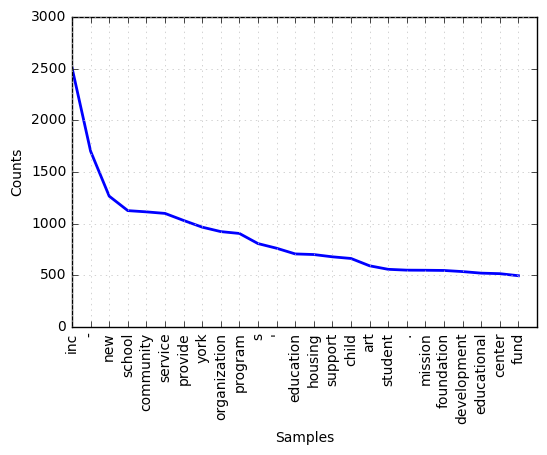

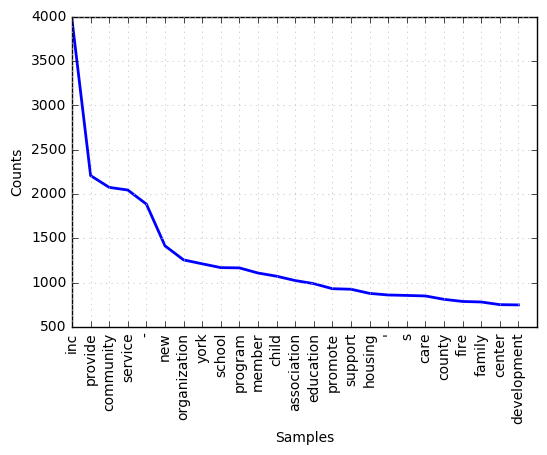

In [33]:
nyc_counts.plot(25, cumulative=False)
nys_counts.plot(25, cumulative=False)

These plots are not really very interesting - just looking at the common words doesn't really tell us very much.  What is more useful, is to look at the word frequences and see if they can be used predictively to figure out what class of text they are associated with.  This process is the basis of text classification in machine learning, which is what the internal grant autoclassifier is based on.  

To get a quick sense of what this is all about we can look for words that are most likely to differentiate NYC from NYS nonprofits.  These are words that are common in on class of text and uncommon in the other.

**Question:** using the tools we have reviewed above, can you figure out what 50 words best differentiate NYC from NYC mission statements?  Using this information, can you predict whether or not nonprofit with these mission statements are located in New York City:

"To support the county fire club"

"To support new student art"

Here is some starting code - hint: you can iterate through the words and get the difference between the frequencies of the two classes, and put each word and the difference in a tuple.  Then you can sort the list by the absolute value of the difference e.g: 

sorted_list = sorted(d, key=lambda x: abs(x[1]), reverse=True)

In [34]:
import nltk
from nltk.corpus.reader import PlaintextCorpusReader
nyc = PlaintextCorpusReader("./", "./nyc.txt")
nys = PlaintextCorpusReader("./", "./nys.txt")

nyc_counts  = nltk.FreqDist(nyc.words("./nyc.txt"))
nys_counts  = nltk.FreqDist(nyc.words("./nys.txt"))

words = list(set(nyc.words("./nyc.txt")))
########### Your code here ############


Natural language processing is a big field with many sub-fields. If you are interested in pursuing this further, I would really recommend working through the NLTK toolkit book, then signing up for some of the text mining coursera courses.  

## Answers - don't peek!

Pull out eins, zips and state abbreviations

In [ ]:
    words = line.split(" ")
    output = []
    for i in range(len(words)-1):
        w = words[i]
        if i == 0:
            output.append(w)
        elif len(w) == 5 and w.isdigit():
            output.append(w)
        elif len(w) == 2 and w.isupper() and words[i+1].isdigit() and len(words[i+1]) == 5:
            output.append(w)
    print(json.dumps(output))

Regex example:

In [ ]:
p = re.compile('\d{9}\s') # Finds the 9-digit number
m = p.findall(s)
print(m)

p = re.compile('\d{5}\s') # Finds the 5-digit number
m = p.findall(s)
print(m)

p = re.compile('\s[A-Z]{2}\s') # Finds the 
m = p.findall(s)
print(m)

Word-counter

In [ ]:
            text = d["mission"]
            word_list = normalize(text)
            for w in word_list:
                word_dict[w] += 1

NYC/NYS text

In [ ]:
d = []
for w in words:
    nyc_f = nyc_counts.freq(w)
    nys_f = nys_counts.freq(w)
    delta = nys_f - nyc_f
    d.append([w, delta])
    
sorted_list = sorted(d, key=lambda x: abs(x[1]), reverse=True)
for item in sorted_list[0:50]:
    which = "NYS"
    if item[1] < 0:
        which = "NYC"
    print(item[0], which)